## Principal Component Analysis
PCA is just a transformation of the data and attempts to find out what features explain the most variance in your data.

### Imports

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Data

In [34]:
df = pd.read_csv("cancer.csv", sep=";")

In [35]:
cancer_target = pd.read_csv("cancer_target.csv", header=None)

In [36]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [38]:
cancer_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [39]:
cancer_target.value_counts()

1    357
0    212
Name: count, dtype: int64

### PCA Visualization
we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. 

#### Data Scaling
We need to scale our data so that each feature has a single unit variance.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

Min Max Normalization:
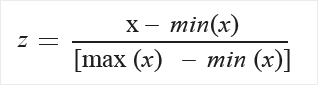

z = (value-mean)/(standard deviation)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [42]:
scaled_data = scaler.transform(df)

In [43]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### PCA Scikit-Learn
PCA with Scikit Learn.
- We instantiate a PCA object
- Find the principal components using the fit method
- Apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)

In [46]:
pca.fit(scaled_data)

PCA(n_components=2)

Now we can transform this data to its first 2 principal components.


Transform:

Apply dimensionality reduction to data.
Data is projected on the first principal components previously extracted from a training set.

In [47]:
x_pca = pca.transform(scaled_data)

In [48]:
scaled_data.shape

(569, 30)

In [49]:
x_pca.shape

(569, 2)

In [50]:
pd.DataFrame(x_pca)

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [51]:
scaled_data[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

##### We've reduced 30 dimensions to just 2. Now, let's plot these two dimensions!

Text(0, 0.5, 'Second Principal Component')

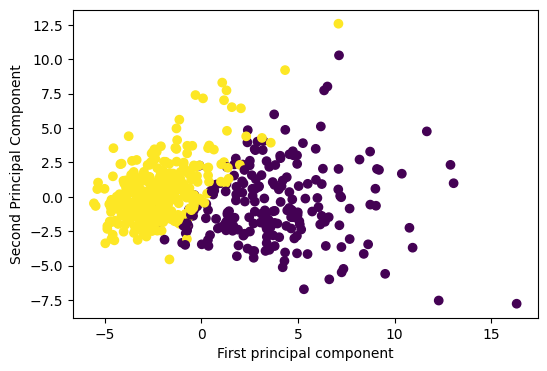

In [52]:
plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_target[0].values)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Variance Explained by each Principal Component

In [53]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [54]:
pca = PCA(n_components=30)
pca.fit(scaled_data)

PCA(n_components=30)

In [55]:
x_pca = pca.transform(scaled_data)

In [56]:
variance_values = pca.explained_variance_ratio_.tolist()
# print(variance_values)

In [60]:
print(len(variance_values))
print(variance_values)

30
[0.44272025607526305, 0.18971182044033102, 0.09393163257431378, 0.06602134915470163, 0.05495768492346263, 0.04024522039883351, 0.022507337129825104, 0.01588723800021328, 0.0138964937455911, 0.011689781894131496, 0.009797189875980172, 0.008705379007378838, 0.008045249871967327, 0.0052336574549263545, 0.003137832167627396, 0.002662093365152316, 0.0019799679253242708, 0.001753959450226361, 0.001649253059225164, 0.0010386467483387049, 0.0009990964637002534, 0.0009146467510543467, 0.0008113612588991054, 0.0006018335666716714, 0.0005160423791651863, 0.00027258799547750064, 0.00023001546250596465, 5.297792903809447e-05, 2.496010324687657e-05, 4.434827427366903e-06]


In [70]:
sum(variance_values[:14])

0.9833502905469194

### Scree Plot

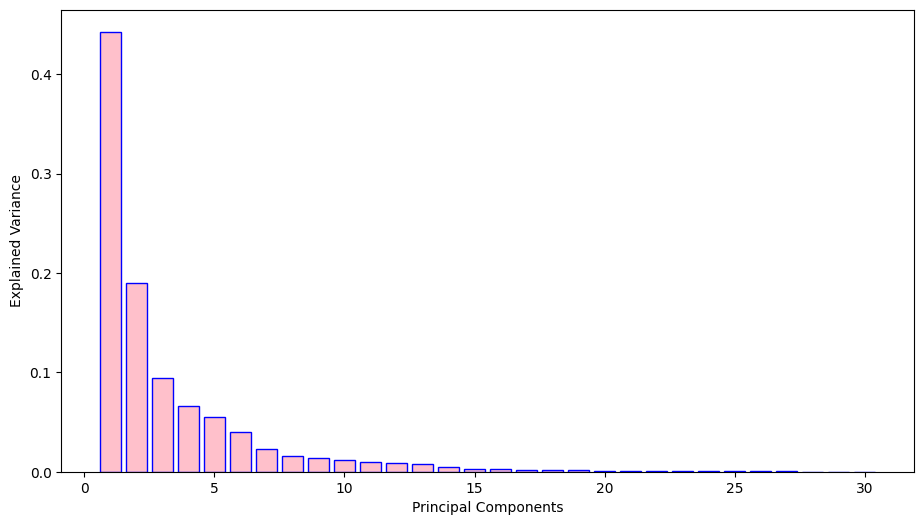

In [58]:
plt.figure(figsize=(11,6))
plt.bar(x=[i for i in range(1,31)], height=variance_values, color="pink", edgecolor="blue")
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

Text(0, 0.5, 'Explained variance (%)')

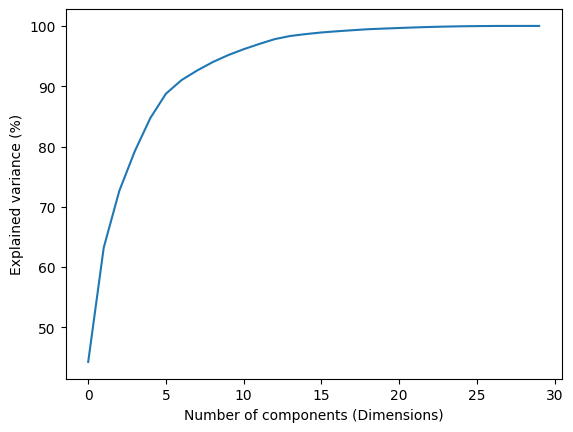

In [59]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

### Classification using PCA as Feature Selector

In [71]:
# For transforming data to use 10 components/features only for 
# classification
pca = PCA(n_components=10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [72]:
x_pca.shape

(569, 10)

In [73]:
type(x_pca)

numpy.ndarray

In [74]:
x_pca.dtype

dtype('float64')

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model  import LogisticRegression

In [76]:
logistic_classifier = LogisticRegression(solver='liblinear')

In [77]:
kfold = KFold(n_splits=10)

In [78]:
X = x_pca
y = cancer_target.values
y.shape

(569, 1)

If cancer_target.values is passed without changing the shape:

result = cross_val_score(logistic_classifier, x_pca, cancer_target.values, cv=kfold)

<img src="xpca_warning.png" alternate="warning: A column-vector y was passed when a 1d array was expected.">

In order to reduce the dimension to 1, we use np.ravel(). np.ravel() returns a contiguous flattened array.

In [79]:
y = np.ravel(y)

In [80]:
y.shape

(569,)

In [81]:
result = cross_val_score(logistic_classifier, X, y, cv=kfold)

In [82]:
result

array([0.98245614, 0.96491228, 0.96491228, 0.96491228, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 1.        , 0.96428571])

In [83]:
print("Accuracy: {:.4f} Standard Deviation: {:.2f}".format(result.mean()*100.00, result.std()*100.00))

Accuracy: 97.7130 Standard Deviation: 1.13


### Classification without Dimensionality Reduction / Feature Selection

In [84]:
# original unscaled data
df.values.shape

(569, 30)

In [85]:
# original scaled data
scaled_data.shape

(569, 30)

In [86]:
y.shape

(569,)

Classification using unscaled data

In [87]:
X = df.values
result = cross_val_score(logistic_classifier, X, y, cv=kfold)

In [88]:
print("Accuracy: {:.4f} Standard Deviation: {:.2f}".format(result.mean()*100.00, result.std()*100.00))

Accuracy: 95.0815 Standard Deviation: 2.69


### Classification using scaled data

In [89]:
X = scaled_data
result = cross_val_score(logistic_classifier, X, y, cv=kfold)

In [90]:
print("Accuracy: {:.4f} Standard Deviation: {:.2f}".format(result.mean()*100.00, result.std()*100.00))

Accuracy: 97.5407 Standard Deviation: 1.61


In [91]:
X.shape

(569, 30)

Note:
- Here, the we are using 30 dimensions
- The accuracy is better when scaled data is used (97.5) compared to unscaled data (95.08)
- The accuracy is better when useless features are reduced. As accuracy of pca with 10 components is better (97.7) compared to when dimensionality is not reduced (97.5) 